In [34]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import re
import missingno as msno

In [35]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'
df = pd.read_csv(url, delimiter=';')

df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2
5997,2007-2020-06-11T17:22:00+02:00,11/06/2020,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3
5998,10004-2020-08-13T04:59:00+02:00,13/08/2020,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5


#### Sjekker typen til hver av kolonnene. Her kommer de fleste kolonnene opp som object. For å sjekke hver enkelt kolonne må vi bruke iloc, dette gjør vi etter at vi dropper kolonner, slik at det ikke må gjøres på så mange

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   TurId                                      6000 non-null   object
 1   Dato                                       6000 non-null   object
 2   Fylke                                      6000 non-null   object
 3   Område                                     6000 non-null   object
 4   Kommune                                    6000 non-null   object
 5   Holdeplass_Fra                             6000 non-null   object
 6   Holdeplass_Til                             6000 non-null   object
 7   Linjetype                                  6000 non-null   object
 8   Linjefylke                                 6000 non-null   object
 9   Linjenavn                                  6000 non-null   object
 10  Linjeretning                        

#### Sjekker min/max verdier (outliers) for å se om det er noe som må ryddes opp i. Rart at det er -39 på antall passasjerer

In [37]:
df.describe()

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,6000.000000,6000.000000,6000.000000
mean,0.492000,104.712167,4.512833
std,0.499978,24.225196,6.735730
min,0.000000,33.000000,-39.000000
25%,0.000000,80.000000,0.000000
50%,0.000000,106.000000,3.000000
75%,1.000000,112.000000,7.000000
max,1.000000,151.000000,64.000000


#### Sjekker om noen rader inneholder tomme felter. Dobbeltsjekker, fordi det er rart at ingen rader inneholder tomme felter

In [38]:
df=df.replace(r'^\s*$', np.nan, regex=True)
df.isna().sum()

TurId                                        0
Dato                                         0
Fylke                                        0
Område                                       0
Kommune                                      0
Holdeplass_Fra                               0
Holdeplass_Til                               0
Linjetype                                    0
Linjefylke                                   0
Linjenavn                                    0
Linjeretning                                 0
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     0
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      0
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    0
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     0
Kjøretøy_Kapasitet                           0
Passasjerer_Ombord                           0
dtype: int64

#### Finner ut hvor mange felter som står som minus-verdier på passasjerer

In [39]:
sum(df["Passasjerer_Ombord"]<0)

667

#### Dropper radene med minus-verdier på passasjerer

In [40]:
df_new=df[df["Passasjerer_Ombord"]>0]

#### Sjekker at det er 0 felter igjen med minus-verdier på passasjerer

In [41]:
sum(df_new["Passasjerer_Ombord"]<0)

0

#### Sjekker kolonnenavn

In [42]:
df.columns

Index(['TurId', 'Dato', 'Fylke', 'Område', 'Kommune', 'Holdeplass_Fra',
       'Holdeplass_Til', 'Linjetype', 'Linjefylke', 'Linjenavn',
       'Linjeretning', 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra',
       'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra',
       'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra',
       'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra', 'Kjøretøy_Kapasitet',
       'Passasjerer_Ombord'],
      dtype='object')

#### Dropper kolonner vi ikke skal bruke i feature engineering. Noen av kolonnene vi dropper kan være unike, men inneholder ikke dataen vi ønsket å jobbe med. Siden vi skal bruke 5 kolonner i denne oppgaven dropper vi de andre. 
#### Vi tolket oppgaven slik at vi skulle manipulere data ifra 5 utvalgte unike features fra det originale datasettet. Senere har vi gjort en oppgave hver med disse kolonnene.

In [43]:
df_new = df_new.drop(columns=["TurId", "Område", "Fylke", "Linjefylke", "Linjeretning", "Holdeplass_Fra", "Holdeplass_Til", "Tidspunkt_Faktisk_Avgang_Holdeplass_Fra", "Tidspunkt_Planlagt_Avgang_Holdeplass_Fra", "Linjetype", "Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra", "Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"])
df_new.head()


,Dato,Kommune,Linjenavn,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,10/08/2020,Bærum,150,112,5
1,15/08/2020,Bærum,150,112,5
2,03/08/2020,Bærum,150,112,6
3,27/07/2020,Bærum,150,112,10
4,27/08/2020,Bærum,150,112,10


#### Nå har vi 5 unike kolonner for dette datasettet

In [44]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4376 entries, 0 to 5998
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Dato                4376 non-null   object
 1   Kommune             4376 non-null   object
 2   Linjenavn           4376 non-null   object
 3   Kjøretøy_Kapasitet  4376 non-null   int64 
 4   Passasjerer_Ombord  4376 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 205.1+ KB


#### Nå sjekker vi hva slags typer de ulike kolonnene er med iloc, siden de kun vises som "object" under info

In [45]:
print(type(df_new["Dato"].iloc[0]), type(df_new["Kommune"].iloc[0]), type(df_new["Linjenavn"].iloc[0]), type(df_new["Kjøretøy_Kapasitet"].iloc[0]), type(df_new["Passasjerer_Ombord"].iloc[0]))

<class 'str'> <class 'str'> <class 'str'> <class 'numpy.int64'> <class 'numpy.int64'>


#### Sjekker hvilke typer kolonnen inneholder, måte å sjekke nans hvis det ikke er nans. 
#### Sjekker ikke kommune eller passasjerer, passasjerer har vi allerede fjernet negative verdier, og kommune skal vi behandle for seg selv lenger ned


In [46]:
df_new["Dato"].unique()

array(['10/08/2020', '15/08/2020', '03/08/2020', '27/07/2020',
       '27/08/2020', '01/08/2020', '28/07/2020', '16/08/2020',
       '13/08/2020', '23/06/2020', '06/08/2020', '17/07/2020',
       '16/06/2020', '16/07/2020', '27/06/2020', '12/06/2020',
       '03/06/2020', '25/08/2020', '30/06/2020', '11/08/2020',
       '14/08/2020', '02/08/2020', '13/07/2020', '09/06/2020',
       '18/06/2020', '30/07/2020', '09/08/2020', '01/07/2020',
       '20/07/2020', '04/07/2020', '11/06/2020', '29/07/2020',
       '03/07/2020', '08/07/2020', '14/06/2020', '14/07/2020',
       '26/06/2020', '18/08/2020', '13/06/2020', '20/06/2020',
       '09/07/2020', '08/08/2020', '29/06/2020', '05/08/2020',
       '28/06/2020', '15/06/2020', '04/06/2020', '23/07/2020',
       '25/07/2020', '05/07/2020', '01/06/2020', '22/06/2020',
       '22/07/2020', '02/06/2020', '22/08/2020', '05/06/2020',
       '21/07/2020', '21/08/2020', '17/08/2020', '19/08/2020',
       '28/08/2020', '31/07/2020', '02/07/2020', '30/08

In [47]:
df_new['Linjenavn'].unique()

array(['150', '31', '490', '3772', '430', '110E', '260', '100', '310',
       '480', '340', '60', '470', '290', '365', '410', '445', '425',
       '400E', '315', '350', '120', '240', '440', '251', '110', '490E',
       '441', '450', '28', '455', '41', '210', '130', '485', '140', '400',
       '45', '150E', '395', '381', '320', '285', '390', '74', '370A',
       '550', '385', '37', '34', '3872', '480E', '270', '46', '2135',
       '245', '397', '3773', '230', '330', '21', '2139', '3533', '3874',
       '215B', '54', '3834', '5N', '2733', '3839', '396', '3658', '2633',
       '3535', '160E', '370B', '300', '345', '3684', '160', '420', '280',
       '115E', '460', '380', '250', '360', '91', '215A', '390E', '3783',
       '442', '250E', '256', '470E', '4B', '265', '40', '2138', '375',
       '220', '3172', '261', '2137', '265E', '125E', '3571', '321',
       '260E', '2N', '255E', '3638', '300E', '3575', '140E', '31E',
       '3833', '3742', '145', '2634', '67', '405', '3737', '3071', '3643

In [48]:
df_new['Kjøretøy_Kapasitet'].unique()

array([112, 151, 106,  71, 115,  72, 105,  33,  77,  80,  75,  76,  69,
       130,  47,  70, 103, 102], dtype=int64)

#### Sjekker antall rader, burde være færre enn vi startet med siden vi har droppet alle med negative verdier

In [49]:
df_new.tail(5)
#Kan også bruke len(df_new)

,Dato,Kommune,Linjenavn,Kjøretøy_Kapasitet,Passasjerer_Ombord
5993,30/08/2020,Alna,100,151,5
5995,10/06/2020,Lillestrøm,100,151,2
5996,23/06/2020,Lillestrøm,100,151,2
5997,11/06/2020,Sagene,20,106,3
5998,13/08/2020,Gamle Oslo,100,151,5


#### Resetter indexen slik at totalt antall rader er riktig

In [50]:
df_new = df_new.reset_index(drop=True)
df_new.tail(5)

,Dato,Kommune,Linjenavn,Kjøretøy_Kapasitet,Passasjerer_Ombord
4371,30/08/2020,Alna,100,151,5
4372,10/06/2020,Lillestrøm,100,151,2
4373,23/06/2020,Lillestrøm,100,151,2
4374,11/06/2020,Sagene,20,106,3
4375,13/08/2020,Gamle Oslo,100,151,5


#### Sjekker hvilke "kommuner" som er registrert i datasettet

In [51]:
df_new["Kommune"].value_counts()

Lillestrøm           810
Bærum                439
Lørenskog            388
Ullensaker           261
Asker                259
Gamle Oslo           219
Nittedal             193
Rælingen             187
Alna                 181
Bjerke               154
Nannestad            144
Stovner              108
Eidsvoll             105
Enebakk              105
Aurskog-Høland        86
Vestre Aker           85
Nes                   75
Grünerløkka           73
Gjerdrum              72
Grorud                69
Ullern                68
Nordstrand            65
Sentrum               61
St.Hanshaugen         34
Sagene                28
Frogner               24
Søndre Nordstrand     21
Lier                  15
Nordre Follo          12
Indre Østfold         10
Nordre Aker            8
Nordmarka              6
Hurdal                 6
Drammen                5
Name: Kommune, dtype: int64

#### Grupperer bydeler til kommune 'Oslo', så datasettet faktisk skiller på kommuner og ikke kommune+bydel

In [52]:
df_new["Kommune"] = df_new["Kommune"].replace(['Gamle Oslo', 'Alna', 'Bjerke', 'Stovner', 'Grünerløkka', 'Grorud', 'Nordstrand', 'Sentrum', 'St.Hanshaugen', 'Sagene', 'Frogner', 'Søndre Nordstrand', 'Vestre Aker', 'Ullern', 'Nordre Aker'], 'Oslo')

#### Sjekker våre nye kommuner

In [53]:
df_new["Kommune"].value_counts()

Oslo              1198
Lillestrøm         810
Bærum              439
Lørenskog          388
Ullensaker         261
Asker              259
Nittedal           193
Rælingen           187
Nannestad          144
Eidsvoll           105
Enebakk            105
Aurskog-Høland      86
Nes                 75
Gjerdrum            72
Lier                15
Nordre Follo        12
Indre Østfold       10
Hurdal               6
Nordmarka            6
Drammen              5
Name: Kommune, dtype: int64

#### Sjekker første 20 rader i datasettet

In [54]:
df_new.head(20)

,Dato,Kommune,Linjenavn,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,10/08/2020,Bærum,150,112,5
1,15/08/2020,Bærum,150,112,5
2,03/08/2020,Bærum,150,112,6
3,27/07/2020,Bærum,150,112,10
4,27/08/2020,Bærum,150,112,10
5,01/08/2020,Oslo,31,151,8
6,28/07/2020,Bærum,150,112,1
7,16/08/2020,Bærum,150,112,2
8,13/08/2020,Bærum,150,112,4
9,23/06/2020,Indre Østfold,490,106,1


## Oppgave 1:
### Regne ut hvilken prosentandel av buss som er fyllt opp på hver avgang

In [55]:
#Viser kun 2 desimaltall
df_new["Kapasitetsprosent"] = round((df_new["Passasjerer_Ombord"]/df_new["Kjøretøy_Kapasitet"])*100,2)

#### Sjekker ut vår nye kolonne "Kapasitetsprosent"

In [56]:
df_new.head(20)

,Dato,Kommune,Linjenavn,Kjøretøy_Kapasitet,Passasjerer_Ombord,Kapasitetsprosent
0,10/08/2020,Bærum,150,112,5,4.46
1,15/08/2020,Bærum,150,112,5,4.46
2,03/08/2020,Bærum,150,112,6,5.36
3,27/07/2020,Bærum,150,112,10,8.93
4,27/08/2020,Bærum,150,112,10,8.93
5,01/08/2020,Oslo,31,151,8,5.30
6,28/07/2020,Bærum,150,112,1,0.89
7,16/08/2020,Bærum,150,112,2,1.79
8,13/08/2020,Bærum,150,112,4,3.57
9,23/06/2020,Indre Østfold,490,106,1,0.94


#### Finner gjennomsnittet av "Kapasitetsprosent" for hver buss

In [57]:
MeanBus = []
Buss = []

for Bussen in df_new.Linjenavn.unique():
    Mean = np.mean(df_new[df_new["Linjenavn"] == Bussen]["Kapasitetsprosent"])

    MeanBus.append(Mean)
    Buss.append(Bussen)

#### Skriver ut resultatet ifra forrige utregning i et barplot, endrer farge, størrelse og rotasjon på tekst for å gjøre det mer leselig

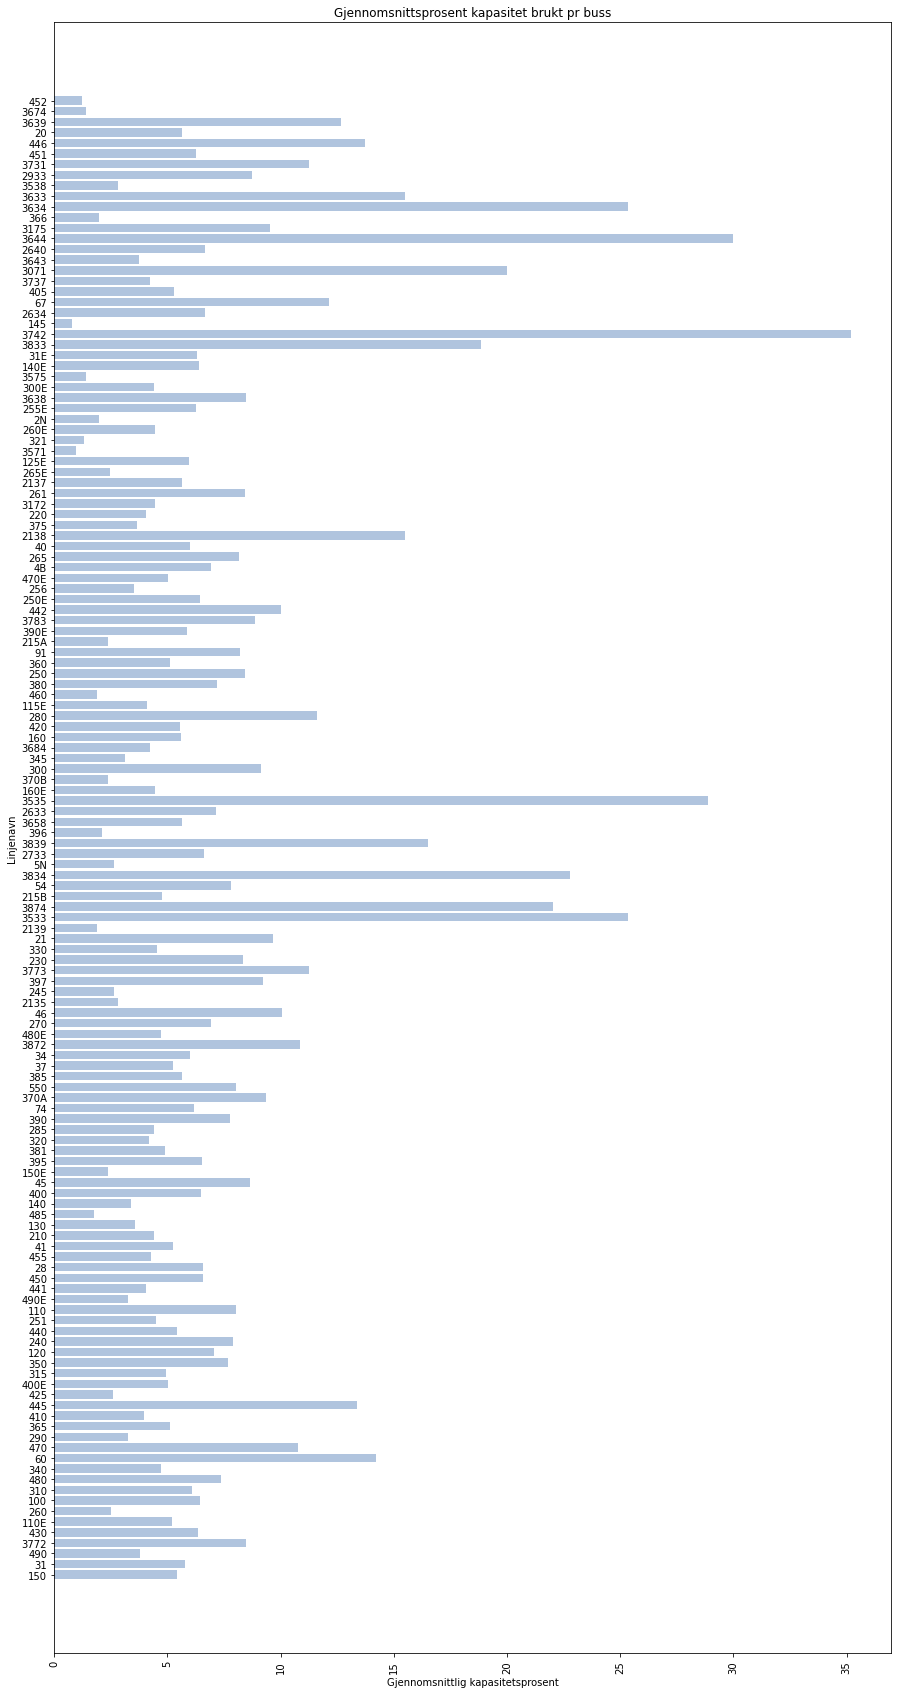

In [58]:
plt.figure(figsize=(15,30))
plt.barh(Buss, MeanBus, color="lightsteelblue")
plt.xticks(rotation=90)
plt.title("Gjennomsnittsprosent kapasitet brukt pr buss")
plt.xlabel("Gjennomsnittlig kapasitetsprosent")
plt.ylabel("Linjenavn")
plt.show()

## Oppgave 2
### Regne ut gjennomsnittlig kapasitetsprosent brukt i hver kommune

In [59]:
df_new.groupby('Kommune').Kapasitetsprosent.mean()

Kommune
Asker              7.016448
Aurskog-Høland     6.421977
Bærum              5.082665
Drammen            7.858000
Eidsvoll           6.996190
Enebakk            5.130952
Gjerdrum           5.130278
Hurdal             8.333333
Indre Østfold      3.395000
Lier              10.594000
Lillestrøm         5.857235
Lørenskog          6.485335
Nannestad          5.002847
Nes                5.512133
Nittedal           5.218342
Nordmarka          5.400000
Nordre Follo       6.875000
Oslo               8.543172
Rælingen           7.186257
Ullensaker         6.352031
Name: Kapasitetsprosent, dtype: float64

#### Lager en graf for gjennomsnittlig kapasitetsprosent brukt i hver kommune

Text(0, 0.5, 'Kapasitetsprosent')

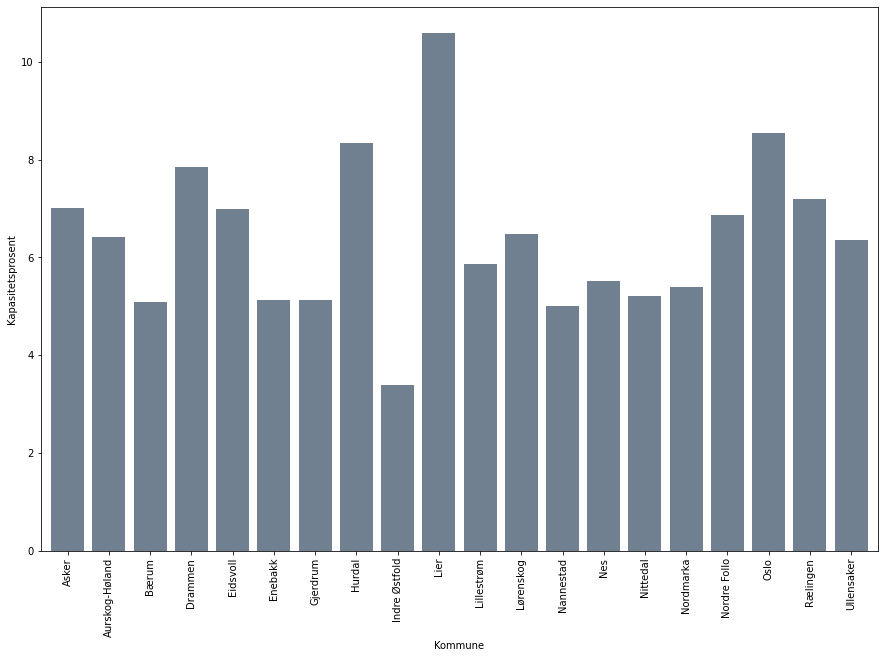

In [60]:
df_new.groupby('Kommune').Kapasitetsprosent.mean().plot.bar(figsize=(15, 10), color="slategray", width=0.8).set_ylabel("Kapasitetsprosent")

## Oppgave 3
### Finne ut hvilken måned som har flest passasjerer

#### Gjør om kolonnen Dato til datetime objekter

In [61]:
df_new['Dato'] = pd.to_datetime(df_new['Dato'])

#### Lager et diagram med antall passasjerer summert per måned. Sorterer månedene i rekkefølge

<AxesSubplot:xlabel='Dato'>

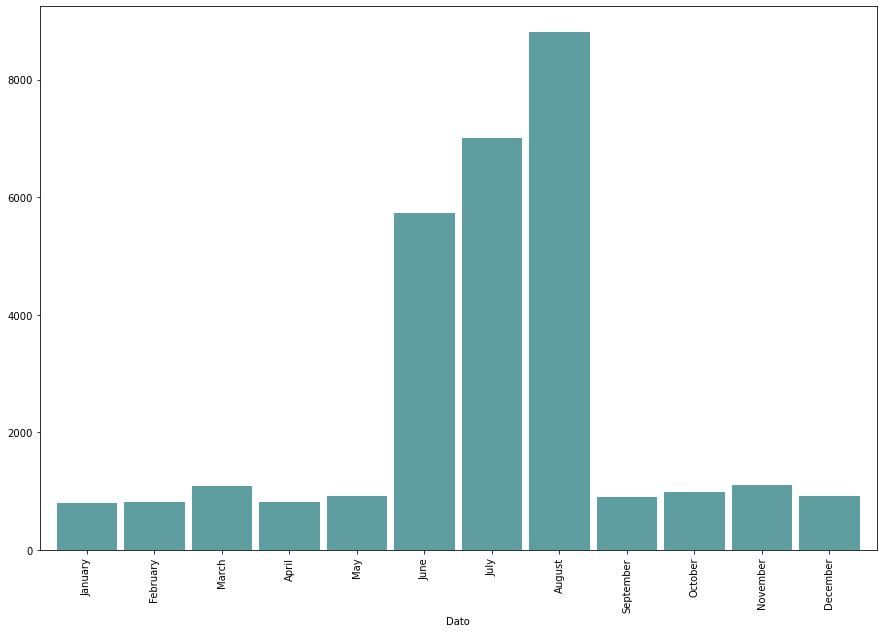

In [62]:
months = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']

df_new.groupby(df_new['Dato'].dt.strftime('%B'))['Passasjerer_Ombord'].sum().reindex(months).plot.bar(figsize=(15,10), color="cadetblue", width=0.9)

## Oppgave 4
### Antall avganger per kommune

#### Visualisering av antall avganger per kommune, sortert etter flest avganger.

Text(0, 0.5, 'Antall avganger')

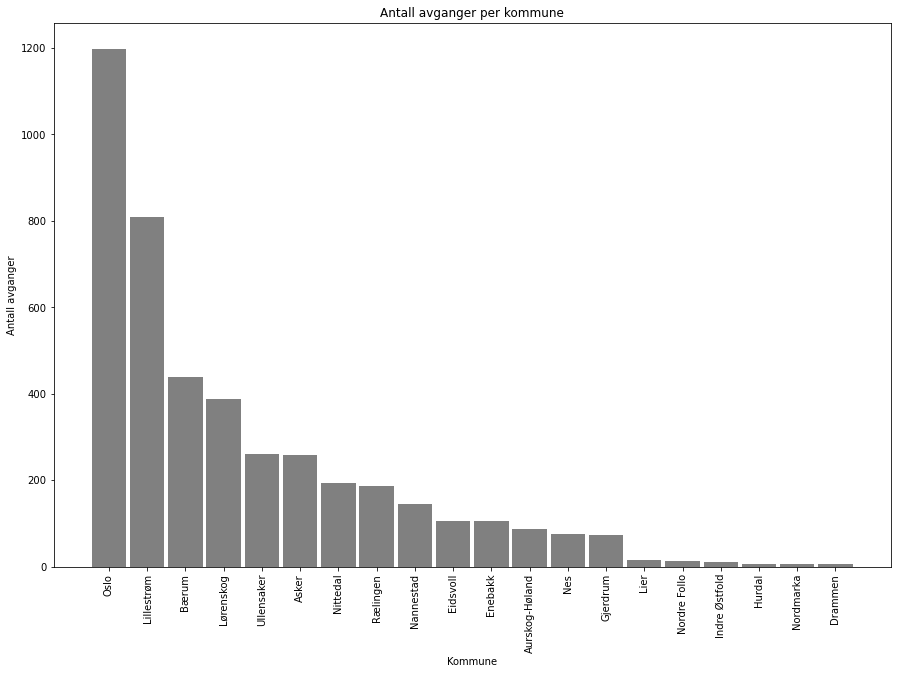

In [63]:
#Hentet fra 'Useful Notebooks': https://github.com/umaimehm/Intro_to_AI_2021/blob/main/Useful%20notebooks/Data-visualization/Matplotlib.ipynb
# create a figure and axis 
fig, ax = plt.subplots(figsize=(15,10)) 
# count the occurrence of each class 
data = df_new['Kommune'].value_counts() 
# get x and y data 
kommune = data.index 
antAvganger = data.values
# create bar chart 
ax.bar(kommune, antAvganger, color="gray", width=0.9) 
# from StackOverflow: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
# rotate x-axis vertically
plt.xticks(rotation=90)
# set title and labels 
ax.set_title('Antall avganger per kommune') 
ax.set_xlabel('Kommune')
ax.set_ylabel('Antall avganger')